## In this tutorial, we will learn how to handle Missing Data in Pandas
In Pandas missing data is represented by two values:

 None: None is a Python singleton object that is often used for missing data in Python code.
 
 NaN : NaN (Not a Number), is a special floating-point value 
 
 Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

    isnull()
    notnull()
    dropna()
    fillna()
    replace()
    interpolate()

In [1]:
import pandas as pd
import numpy as np
 
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}
 
# creating a dataframe 
df = pd.DataFrame(dict)
 
# using isnull() function to check for missing values
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [2]:
df.isnull().sum()

First Score     1
Second Score    1
Third Score     1
dtype: int64

In [3]:
#number of missing data in each column
df.isnull().sum().sum()

3

## Checking for missing values using notnull()

In order to check null values in Pandas Dataframe, we use notnull() function this function return dataframe of Boolean values which are False for NaN values. 

In [4]:
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}
 
# creating a dataframe using dictionary
df = pd.DataFrame(dict)
 
# using notnull() function
df.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


## Filling missing values using fillna(), replace() and interpolate()

In order to fill null values in a datasets, we use fillna(), replace() and interpolate() function these function replace NaN values with some value of their own. All these function help in filling a null values in datasets of a DataFrame. Interpolate() function is basically used to fill NA values in the dataframe but it uses various interpolation technique to fill the missing values rather than hard-coding the value. 


## Method 1: Filling null values with a single value 



In [5]:
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

df = pd.DataFrame(dict)
 
# filling missing value using fillna() 
df2 = df.fillna(0)
df2

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [6]:
df2.isnull().sum()

First Score     0
Second Score    0
Third Score     0
dtype: int64

## Method 2: Filling null values with the previous ones 




In [7]:

dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

df = pd.DataFrame(dict)
 
# filling a missing value with
# previous ones 
df
df2= df.fillna(method ='pad')

In [8]:
df3 = df.fillna (method = 'bfill')
df3

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


## Filling null values in CSV File 



In [9]:
# importing pandas package
import pandas as pd
   
# making data frame from csv file
data = pd.read_csv("employees.csv")
 
# Printing the first 10 to 24 rows of
# the data frame for visualization  
data[10:25]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
14,Kimberly,Female,1/14/1999,7:13 AM,41426,14.543,True,Finance
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product
16,Jeremy,Male,9/21/2010,5:56 AM,90370,7.369,False,Human Resources
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
19,Donna,Female,7/22/2010,3:48 AM,81014,1.894,False,Product


In [10]:
data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

## Now we are going to fill all the null values in Gender column with “No Gender” 

In [11]:
#When inplace = True , the data is modified in place, which means it will return
#nothing and the dataframe is now updated. 
# filling a null values using fillna()
data["Gender"].fillna("No Gender", inplace = True)
 
data

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [12]:
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

## Filling a null values using replace() method 

 
Use Pandas to load the data set (employees.csv) into a Pandas Data Frame. Then replace all Nan value in the Data Frame with -99 value.


In [13]:
# importing pandas package
import pandas as pd
   
# making data frame from csv file
data = pd.read_csv("employees.csv")
 
# Printing the first 10 to 24 rows of
# the data frame for visualization  
data[10:25]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
14,Kimberly,Female,1/14/1999,7:13 AM,41426,14.543,True,Finance
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product
16,Jeremy,Male,9/21/2010,5:56 AM,90370,7.369,False,Human Resources
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
19,Donna,Female,7/22/2010,3:48 AM,81014,1.894,False,Product


## Now we are going to replace the all Nan value in the data frame with -99 value. 

In [14]:
# importing pandas package
import pandas as pd
   
# making data frame from csv file
data = pd.read_csv("employees.csv")
   
# will replace  Nan value in dataframe with value -99 
data.replace(to_replace = np.nan, value = -99)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,-99
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,-99,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [15]:
# importing pandas as pd
import pandas as pd
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
   
# Print the dataframe
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


 Let’s interpolate the missing values using Linear method. Note that Linear method ignore the index and treat the values as equally spaced. 
 
 Output: As we can see the output, values in the first row could not get filled as the direction of filling of values is forward and there is no previous value which could have been used in interpolation.  

In [16]:
# to interpolate the missing values
df.interpolate(method ='linear', limit_direction ='backward')

,A,B,C,D
0,12.0,2.0,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,NaN,8.0,6.0


## Dropping missing values using dropna()
Drop the nulls values using dropna()

a.	Drop rows with at least 1 null value.

b.	Drop rows if all values in that row are missing.

c.	Drop columns with at least 1 null value.


In order to drop a null values from a dataframe, we used dropna() function this function drop Rows/Columns of datasets with Null values in different ways. Code #1: Dropping rows with at least 1 null value. 

In [17]:
# importing pandas as pd
import pandas as pd
 
# importing numpy as np
import numpy as np
 
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, 40, 80, 98],
        'Fourth Score':[np.nan, np.nan, np.nan, 65]}
 
# creating a dataframe from dictionary
df = pd.DataFrame(dict)
   
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52,NaN
1,90.0,NaN,40,NaN
2,NaN,45.0,80,NaN
3,95.0,56.0,98,65.0


In [18]:
# using dropna() function 
df.dropna()

,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98,65.0


## Dropping rows if all values in that row are missing.

In [19]:
# importing pandas as pd
import pandas as pd
 
# importing numpy as np
import numpy as np
 
# dictionary of lists
dict = {'First Score':[100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, np.nan, 80, 98],
        'Fourth Score':[np.nan, np.nan, np.nan, 65]}
 
# creating a dataframe from dictionary
df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [20]:
# using dropna() function   
df4 = df.dropna(how = 'all')
df4

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


## Dropping columns with at least 1 null value. 

In [21]:
# importing pandas as pd
import pandas as pd
  
# importing numpy as np
import numpy as np
  
# dictionary of lists
dict = {'First Score':[100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, np.nan, 80, 98],
        'Fourth Score':[60, 67, 68, 65]}
 
# creating a dataframe from dictionary
df = pd.DataFrame(dict)

df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,60
1,NaN,NaN,NaN,67
2,NaN,45.0,80.0,68
3,95.0,56.0,98.0,65


In [22]:
# using dropna() function    
df.dropna(axis = 1)

,Fourth Score
0,60
1,67
2,68
3,65


## Dropping Rows with at least 1 null value in CSV file 

In [23]:
# importing pandas module
import pandas as pd
   
# making data frame from csv file
data = pd.read_csv("employees.csv")
   
data.isnull().sum().sum()

322

In [24]:
# making new data frame with dropped NA values
new_data = data.dropna(axis = 0, how ='any')
   
new_data.isnull().sum().sum()

0

Now we compare sizes of data frames so that we can come to know how many rows had at least 1 Null value 

print("Old data frame length:", len(data))

In [25]:
print("Old data frame length:", len(data))
print("New data frame length:", len(new_data))
print("Number of rows with at least 1 NA value: ", (len(data)-len(new_data)))

Old data frame length: 1000
New data frame length: 764
Number of rows with at least 1 NA value:  236


## Impute missing data with mean, median or mode

In [26]:
data.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


One of the key points is to decide which technique  to use to get the most effective value for the missing values. Here, the central tendency measure such as mean, median, or mode is considered for imputation. The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately. 

C:\Users\111042\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

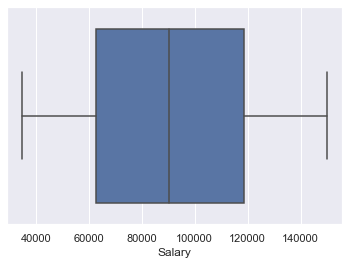

In [27]:
import seaborn as sns
sns.set()

sns.boxplot(data['Salary'])

#sns.distplot(data['Salary']])

In [28]:
df2 = data.fillna(data.mean())
df2.head(10)

C:\Users\111042\AppData\Local\Temp\ipykernel_8796\2826697843.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = data.fillna(data.mean())


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,0.501608,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [29]:
df3 = data.fillna(data.median())
df3.head(10)

C:\Users\111042\AppData\Local\Temp\ipykernel_8796\3237412417.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3 = data.fillna(data.median())


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,1.0,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [30]:
	
df3['Team'] = df3['Team'].fillna(df3['Team'].mode()[0])
df3.head(10)



,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,Client Services
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,1.0,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


## Exercise
1. Load 'Mall_Customers.csv' dataset into a pandas dataframe
2. Check if the dataset contains missing values 
3. Fill all NaN with one specific value (Save it to a new dataframe)
4. Fill all NAN  values with a dictionary of values (Age, Annual income >>0 , Gender >> 'No Gender')
4. Drop Rows with at least 1 null value
5. Interpolate the missing values using Linear method. 
6. Fill in missing data using mean, median and mode
  